In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum().sort_values(ascending=False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [7]:
df.duplicated().sum()

0

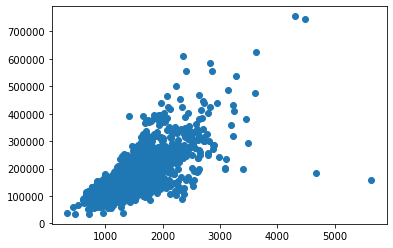

In [8]:
#must do concat to see figure correctly
col_x = 'GrLivArea'
data = pd.concat([df['SalePrice'],df[col_x]],axis=1)
plt.scatter(x=col_x,y='SalePrice',data=data)

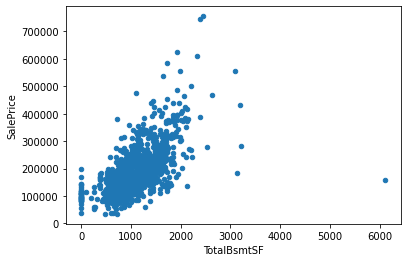

In [9]:
col_x = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'],df[col_x]],axis=1)
data.plot.scatter(x=col_x,y='SalePrice')

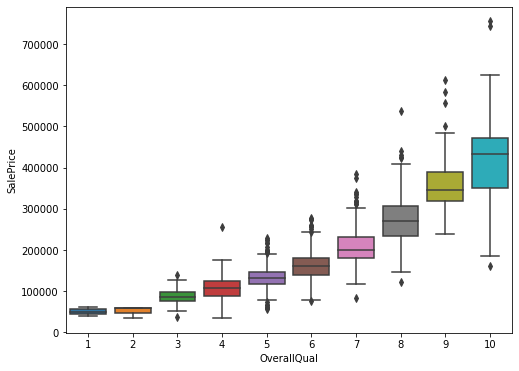

In [10]:
data = pd.concat([df['SalePrice'],df['OverallQual']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual',y='SalePrice',data=data)

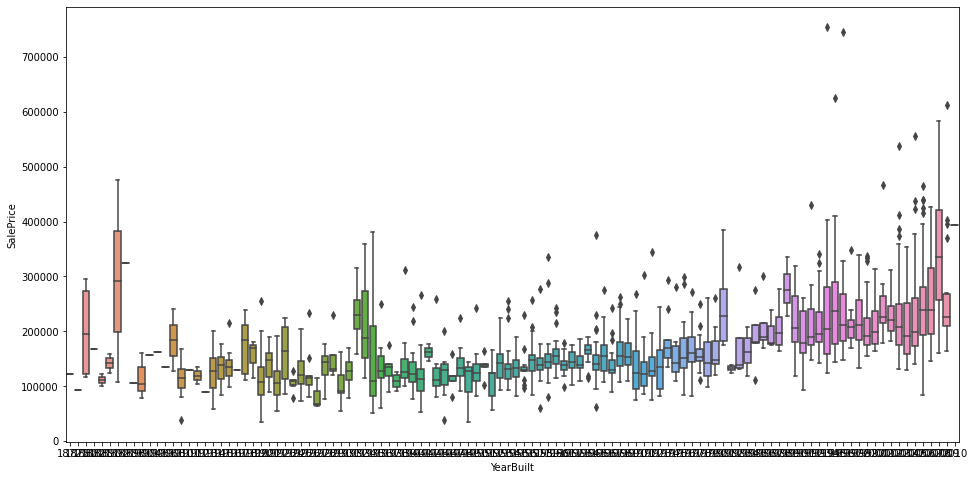

In [11]:
data = pd.concat([df['SalePrice'],df['YearBuilt']],axis=1)
plt.figure(figsize=(16,8))
sns.boxplot(x='YearBuilt',y='SalePrice',data=data)

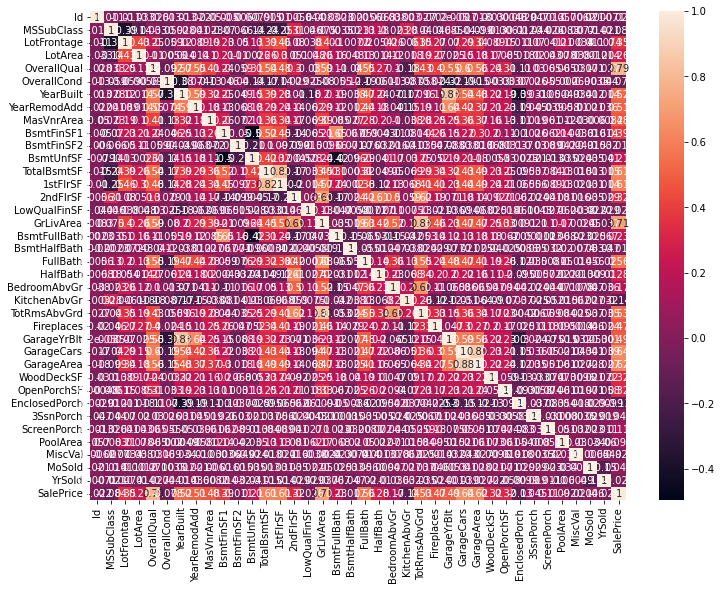

In [12]:
#I have alotof features
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

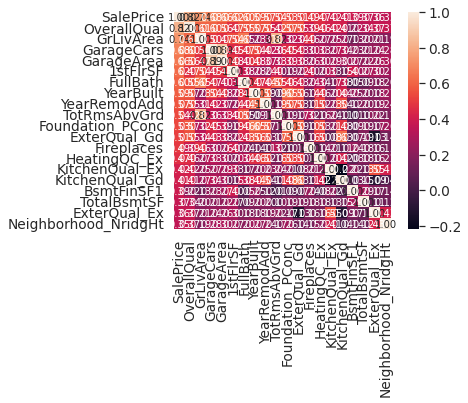

In [55]:
#so i'll choose best 10 (positive correlation)
k = 20
corrmat  = df.corr()
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',square=True,annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


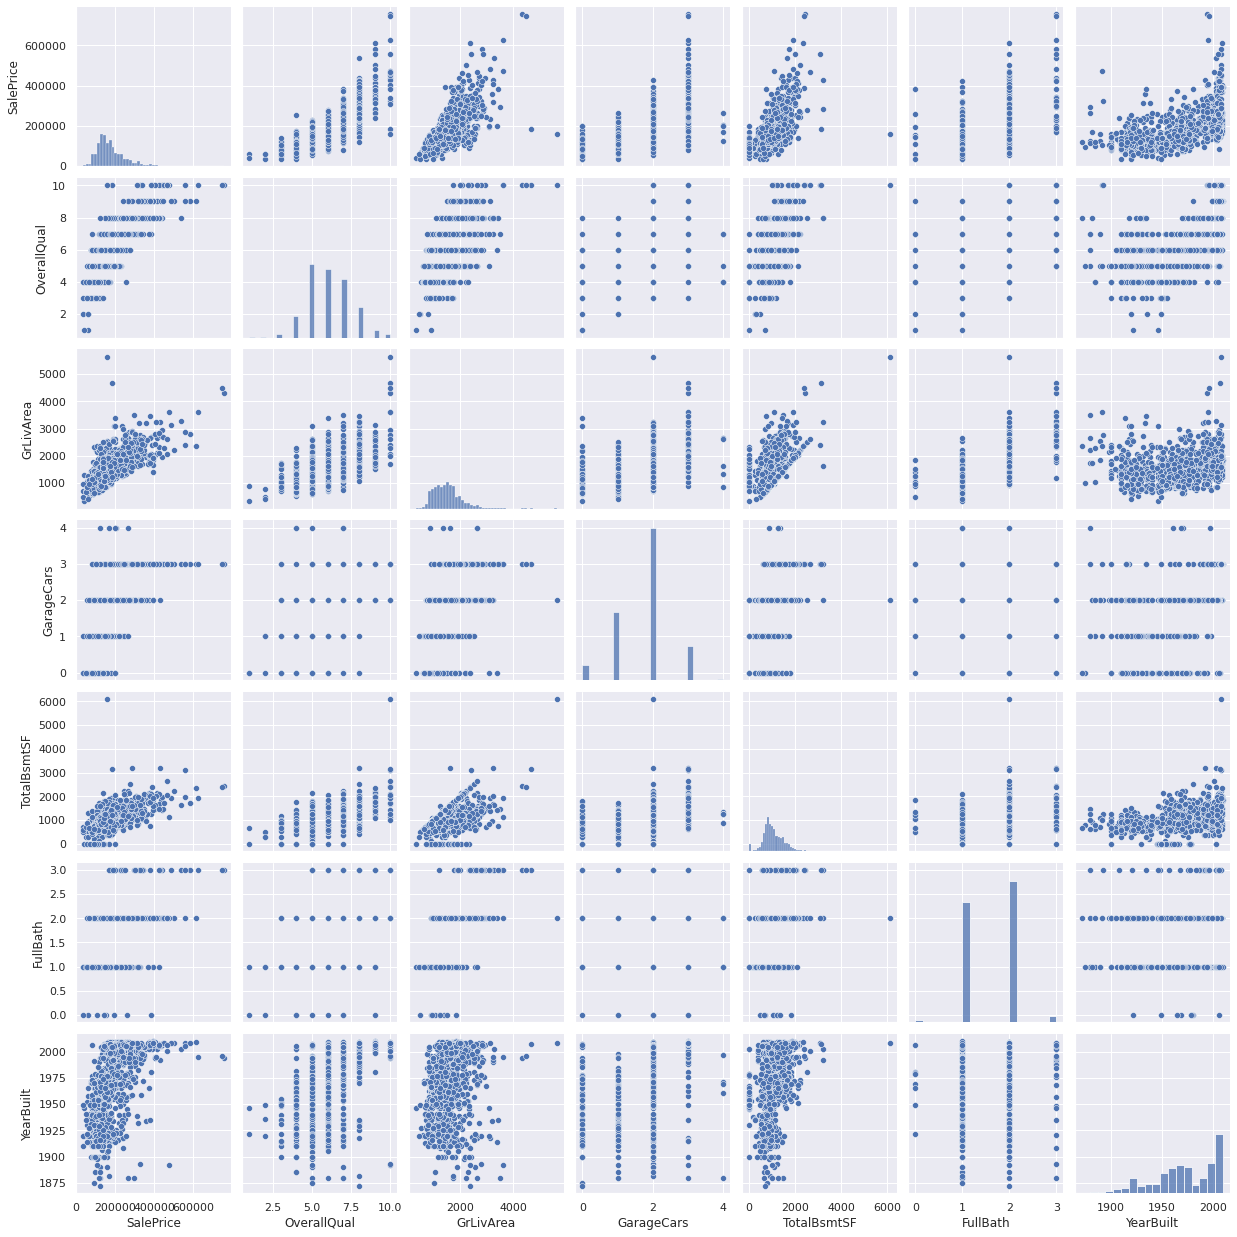

In [14]:
#scatterplot for best 10 correrlation
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df[cols],size=2.5)


In [15]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [16]:
df = df.drop((missing_data[missing_data['Total']>0]).index,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [17]:
df.isnull().sum().sort_values(ascending=False)

Id              0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
               ..
Foundation      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
SalePrice       0
Length: 62, dtype: int64

In [18]:
#In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
low_range,50*'*',high_range

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


(array([[-1.83870376],
        [-1.83352844],
        [-1.80092766],
        [-1.78329881],
        [-1.77448439],
        [-1.62337999],
        [-1.61708398],
        [-1.58560389],
        [-1.58560389],
        [-1.5731    ]]),
 '**************************************************',
 array([[3.82897043],
        [4.04098249],
        [4.49634819],
        [4.71041276],
        [4.73032076],
        [5.06214602],
        [5.42383959],
        [5.59185509],
        [7.10289909],
        [7.22881942]]))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


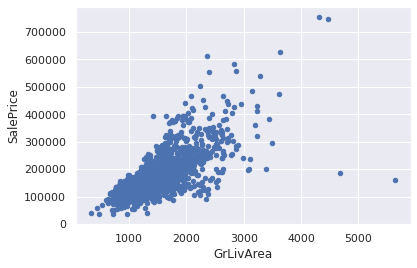

In [19]:
data = pd.concat([df['SalePrice'],df['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

In [20]:
df.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [21]:
df = df.drop(df[df['Id']== 1299].index)
df = df.drop(df[df['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


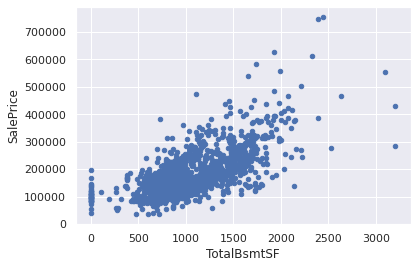

In [22]:
data = pd.concat([df['SalePrice'],df['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


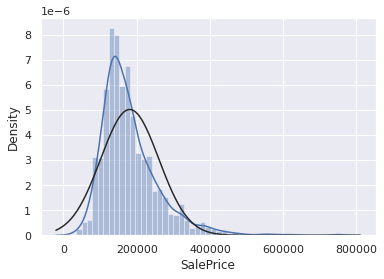

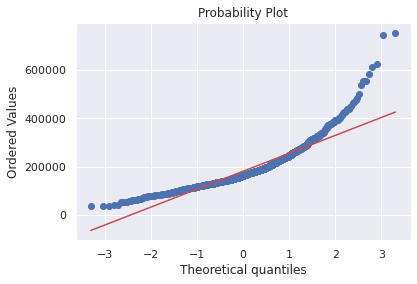

In [23]:
sns.distplot(df['SalePrice'],fit=norm);
fig=plt.figure()
result = stats.probplot(df['SalePrice'],plot=plt)

In [24]:
#do log to get better
df['SalePrice'] = np.log(df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


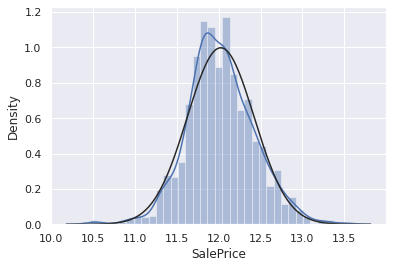

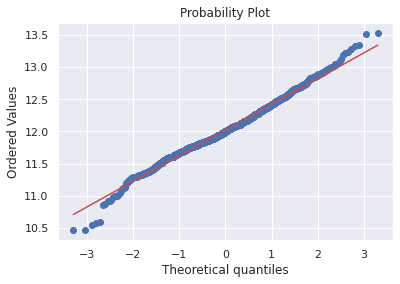

In [25]:
sns.distplot(df['SalePrice'],fit=norm);
fig = plt.figure()
result = stats.probplot(df['SalePrice'],plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


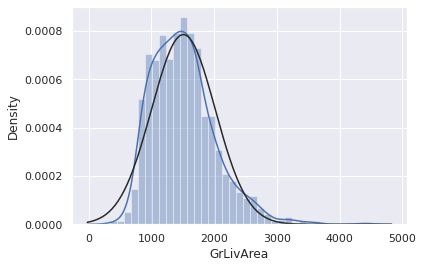

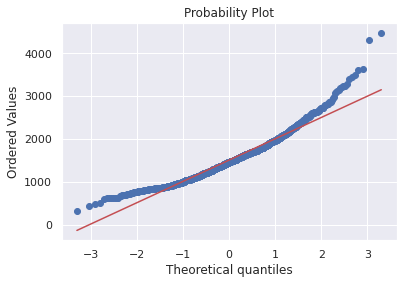

In [26]:
sns.distplot(df['GrLivArea'],fit=norm);
fig=plt.figure()
result = stats.probplot(df['GrLivArea'],plot=plt)

In [27]:
df['GrLivArea'] = np.log(df['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


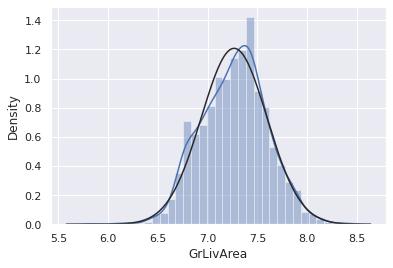

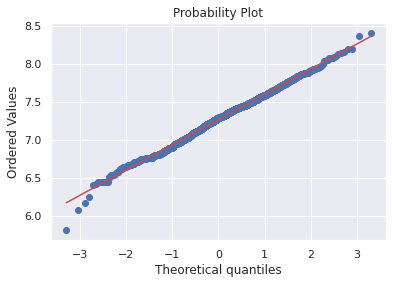

In [28]:
sns.distplot(df['GrLivArea'],fit=norm);
fig= plt.figure()
result = stats.probplot(df['GrLivArea'],plot=plt)

In [29]:
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']),index=df.index)
df['HasBsmt'] = 0
df.loc[df['TotalBsmtSF'] > 0,'HasBsmt'] = 1


In [30]:
#i did it log for == 1  
#i didn't do for 0 because log 0 = infinity
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


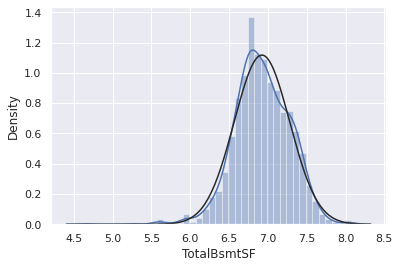

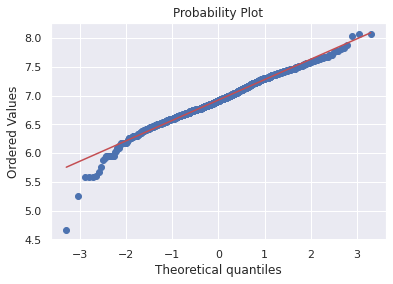

In [31]:
sns.distplot(df[df['TotalBsmtSF'] >0]['TotalBsmtSF'],fit=norm)
fig = plt.figure()
result = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

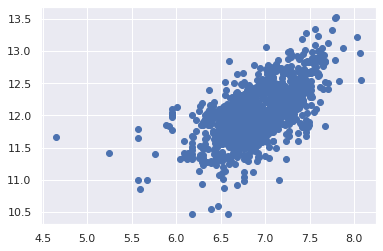

In [32]:
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'],df[df['TotalBsmtSF']>0]['SalePrice'])

In [33]:
df = pd.get_dummies(df)

In [73]:
X = df.iloc[: , : -1]
y = df['SalePrice']
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,0,1
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,0,1
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,0,1
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,1,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,1,0,0,0,0,1
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,1,0,0,0,0,1
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,0,1,0,0,0,0,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1020, 216), (438, 216), (1020,), (438,))

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [64]:
from sklearn.svm import SVR
modelSVR = SVR()
modelSVR.fit(X_train,y_train)
y_pred = modelSVR.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7082891819646939

In [65]:
from sklearn.tree import DecisionTreeRegressor
modeltree = DecisionTreeRegressor()
modeltree.fit(X_train,y_train)
y_pred = modeltree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9985842578618928

In [66]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor()
modelRFR.fit(X_train,y_train)
y_pred = modelRFR.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9980278806408838

In [67]:
from sklearn.linear_model import Lasso
modelL = Lasso()
modelL.fit(X_train,y_train)
y_pred = modelL.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.804337102630102

In [68]:
from sklearn.neighbors import KNeighborsRegressor
modelKNN = KNeighborsRegressor()
modelKNN.fit(X_train,y_train)
y_pred = modelKNN.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6121456784682664

In [69]:
from sklearn.linear_model import Ridge
modelRR = Ridge()
modelRR.fit(X_train,y_train)
y_pred = modelRR.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9991372283639235